In [1]:
import time
from pathlib import Path
import pandas as pd

# Specify data path where datasets are placed
data_dir = Path('../data')

# Read dataset
# https://www.kaggle.com/roustekbio/breast-cancer-csv/data
data = pd.read_csv(data_dir / 'breastCancer.csv')

# Extract Labels
Y = data[data.columns[-1]].values

# Extract feature values from dataset
X_raw = data.iloc[:, 1:-1]

# Normalize data
X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())

# Convert Data into Numpy array
X = X.to_numpy()
X = X.copy('C')

In [2]:
# Import TSNE

# Rapidsai version
from cuml.manifold import TSNE

# CPU Version
#from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

In [3]:
# Fit tSNE on data
t0 = time.time()
X_2d = tsne.fit_transform(X)
t1 = time.time()
total = t1-t0

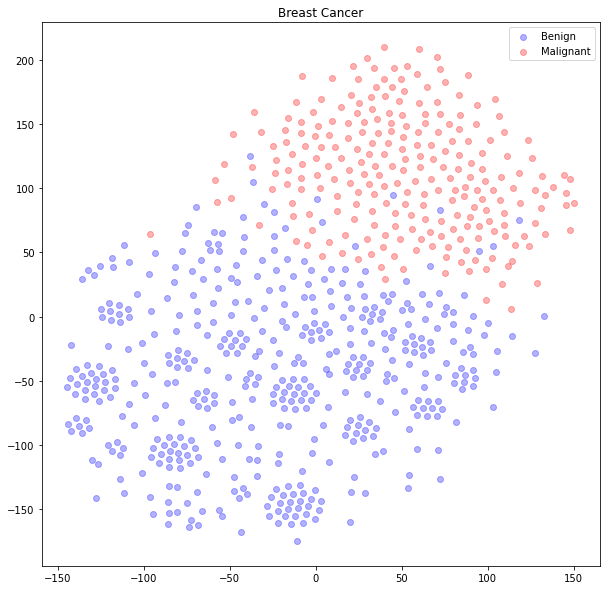

In [4]:
# Plot Data with labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Breast Cancer")
plt.scatter(X_2d[Y == 2,0], X_2d[Y == 2,1], c='b', label='Benign', alpha=0.3)
plt.scatter(X_2d[Y == 4,0], X_2d[Y == 4,1], c='r', label='Malignant', alpha=0.3)
plt.legend()
plt.show()

In [5]:
print("Total Time spent on fitting tSNE:", total)

Total Time spent on fitting tSNE: 0.8230500221252441
